# Introduction

This notebook generates fake CRM data using the Google Analytics dataset. We make the assumption that each `fullVisitorId` in Google Analytics corresponds to a hypothetical customer and we generate an age and gender for each customer.

## Age distribution

The customer ages are related to whether they are repeat buyers:

* *Repeat buyer* normally-distributed with mean 25 and standard deviation 2
* *One-time buyer* normally-distributed with mean 50 and standard deviation 4


## Gender distribution

Genders are chosen in a uniform distribution with 50% male and 50% female.

## Output

This notebook writes the results to a csv file in the `data` directory.

In [1]:
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt

In [2]:
accounts = pd.read_csv('../data/google_analytics.csv')
rnd.seed(0) # random seed for reproducibility

In [3]:
def generate_age(row):
    return int(round(rnd.gauss(25, 2) if (row['total_transactions'] > 1) else rnd.gauss(50, 4)))

In [4]:
def generate_gender(row):
    return rnd.choice(['male', 'female'])

In [5]:
ages = accounts.apply(generate_age, axis=1)
genders = accounts.apply(generate_gender, axis=1)
crm = pd.DataFrame({'fullVisitorId': accounts['fullVisitorId'],
                    'age': ages,
                    'gender': genders
                   })
print(crm.head(10))

   age        fullVisitorId  gender
0   54   290333981372798422  female
1   44   290333981372798422  female
2   47   395050647250429598  female
3   51   395050647250429598    male
4   46   395050647250429598  female
5   50   395050647250429598    male
6   51   644061149609662421    male
7   47  5446026750047012560    male
8   45  5446026750047012560  female
9   51   754276461062540121    male


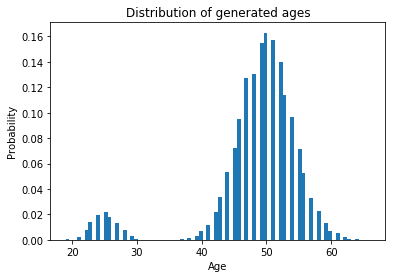

In [6]:
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Distribution of generated ages')
n, bins, patches = plt.hist(ages, bins=80, density=True)

In [7]:
crm.to_csv("../data/crm.csv")